In [2]:
import os
# !pip install seaborn
import seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# !pip install mpld3
import mpld3
import json

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 10)
%matplotlib inline
mpld3.enable_notebook()

In [3]:
# df = pd.read_csv('../shared-resources/crimedata.csv')
df = pd.DataFrame.from_csv('../shared-resources/crimedata.csv', index_col=0)
df.tail()

record_id report_date report_time  major_offense_type  \
id                                                             
61502   14462443  2014-11-16    19:19:00             Larceny   
61503   14380280  2014-06-16    08:39:00  Disorderly Conduct   
61504   14399950  2014-07-16    11:02:00         Liquor Laws   
61505   14426109  2014-09-01    15:33:00             Larceny   
61506   14424628  2014-09-13    19:55:00             Larceny   

                                                 address     neighborhood  \
id                                                                          
61502  2001-2099 block of NW KEARNEY ST, PORTLAND, OR...        NORTHWEST   
61503  1901-2099 block of NE HALSEY ST, PORTLAND, OR ...  SULLIVANS GULCH   
61504      0-298 block of NW 22ND PL, PORTLAND, OR 97210        NORTHWEST   
61505                                    WASHINGTON PARK  ARLINGTON HGHTS   
61506  14133-14299 block of NE WEIDLER ST, PORTLAND, ...           WILKES   

        police_precinct police_district   xcoordinate   ycoordinate  
id                                                                   
61502  PORTLAND PREC CE             810  7.640298e+06  686652.67979  
61503  PORTLAND PREC NO             670  7.652081e+06  687944.91175  
61504  PORTLAND PREC CE             810  7.638988e+06  684566.18996  
61505  PORTLAND PREC CE             860  7.638009e+06  683215.81507  
61506  PORTLAND PREC EA             942  7.685328e+06  687304.98392

### Lets set our index to the `report_date` column
(the 3rd column, or column number 2, in our CSV)

In [4]:
df = pd.DataFrame.from_csv('../shared-resources/crimedata.csv', index_col=2)
df.tail()



id  record_id report_time  major_offense_type  \
report_date                                                     
2014-11-16   61502   14462443    19:19:00             Larceny   
2014-06-16   61503   14380280    08:39:00  Disorderly Conduct   
2014-07-16   61504   14399950    11:02:00         Liquor Laws   
2014-09-01   61505   14426109    15:33:00             Larceny   
2014-09-13   61506   14424628    19:55:00             Larceny   

                                                       address  \
report_date                                                      
2014-11-16   2001-2099 block of NW KEARNEY ST, PORTLAND, OR...   
2014-06-16   1901-2099 block of NE HALSEY ST, PORTLAND, OR ...   
2014-07-16       0-298 block of NW 22ND PL, PORTLAND, OR 97210   
2014-09-01                                     WASHINGTON PARK   
2014-09-13   14133-14299 block of NE WEIDLER ST, PORTLAND, ...   

                neighborhood   police_precinct police_district   xcoordinate  \
report_date                                                                    
2014-11-16         NORTHWEST  PORTLAND PREC CE             810  7.640298e+06   
2014-06-16   SULLIVANS GULCH  PORTLAND PREC NO             670  7.652081e+06   
2014-07-16         NORTHWEST  PORTLAND PREC CE             810  7.638988e+06   
2014-09-01   ARLINGTON HGHTS  PORTLAND PREC CE             860  7.638009e+06   
2014-09-13            WILKES  PORTLAND PREC EA             942  7.685328e+06   

              ycoordinate  
report_date                
2014-11-16   686652.67979  
2014-06-16   687944.91175  
2014-07-16   684566.18996  
2014-09-01   683215.81507  
2014-09-13   687304.98392

In [5]:
# Now we can retrieve all the crimes on a particular date just by using the `.loc` getitem method (square brackets)
df.loc['2014-06-16']

id  record_id report_time   major_offense_type  \
report_date                                                      
2014-06-16    6796   14371447    17:49:00  Motor Vehicle Theft   
2014-06-16    7301   14378337    12:39:00              Larceny   
2014-06-16    7450   14378334    08:31:00             Burglary   
2014-06-16    7480   14381092    08:00:00            Vandalism   
2014-06-16    7536   14376997    19:10:00   Disorderly Conduct   
...            ...        ...         ...                  ...   
2014-06-16   60547   14371417    00:46:00              Larceny   
2014-06-16   60815   14371995    17:05:00   Disorderly Conduct   
2014-06-16   61081   14371440    12:39:00              Runaway   
2014-06-16   61352   14372448    18:29:00              Larceny   
2014-06-16   61503   14380280    08:39:00   Disorderly Conduct   

                                                       address  \
report_date                                                      
2014-06-16   5801-5899 block of SE 15TH AVE, PORTLAND, OR 9...   
2014-06-16   2300-2378 block of W BURNSIDE ST, PORTLAND, OR...   
2014-06-16   2500-2698 block of NE 38TH AVE, PORTLAND, OR 9...   
2014-06-16   7300-7398 block of NE 27TH AVE, PORTLAND, OR 9...   
2014-06-16   8000-8098 block of SE 36TH AVE, PORTLAND, OR 9...   
...                                                        ...   
2014-06-16    N BRANDON AVE and N WATTS ST, PORTLAND, OR 97217   
2014-06-16   SW WASHINGTON ST and SW 3RD AVE, PORTLAND, OR ...   
2014-06-16                               Unknown/Not Available   
2014-06-16   2500-2598 block of NE MULTNOMAH ST, PORTLAND, ...   
2014-06-16   1901-2099 block of NE HALSEY ST, PORTLAND, OR ...   

                neighborhood   police_precinct police_district   xcoordinate  \
report_date                                                                    
2014-06-16   SELLWD-MORELAND  PORTLAND PREC CE             742  7.650525e+06   
2014-06-16      GOOSE HOLLOW  PORTLAND PREC CE             860  7.638783e+06   
2014-06-16        GRANT PARK  PORTLAND PREC NO             660  7.657960e+06   
2014-06-16         CONCORDIA  PORTLAND PREC NO             610  7.654667e+06   
2014-06-16      EASTMORELAND  PORTLAND PREC CE             742  7.656667e+06   
...                      ...               ...             ...           ...   
2014-06-16            KENTON  PORTLAND PREC NO             550  7.641697e+06   
2014-06-16          DOWNTOWN  PORTLAND PREC CE             830  7.644734e+06   
2014-06-16         MULTNOMAH  PORTLAND PREC CE             882           NaN   
2014-06-16   SULLIVANS GULCH  PORTLAND PREC NO             670  7.653786e+06   
2014-06-16   SULLIVANS GULCH  PORTLAND PREC NO             670  7.652081e+06   

              ycoordinate  
report_date                
2014-06-16   668745.03084  
2014-06-16   684594.23720  
2014-06-16   690333.64501  
2014-06-16   702825.81266  
2014-06-16   663058.51772  
...                   ...  
2014-06-16   705502.04134  
2014-06-16   683030.70013  
2014-06-16            NaN  
2014-06-16   687113.71916  
2014-06-16   687944.91175  

[175 rows x 10 columns]

In [6]:
# What are the types and sizes of each of our columns?
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61497 entries, 2014-01-06 to 2014-09-13
Data columns (total 10 columns):
id                    61497 non-null int64
record_id             61497 non-null int64
report_time           61497 non-null object
major_offense_type    61497 non-null object
address               61497 non-null object
neighborhood          60616 non-null object
police_precinct       61493 non-null object
police_district       61493 non-null object
xcoordinate           53963 non-null float64
ycoordinate           53963 non-null float64
dtypes: float64(2), int64(2), object(6)
memory usage: 6.4+ MB


In [83]:
# that's a lot of data, let's take a sample so our plots don't take too long to display
df = df.sample(8000)
df.describe()

id     record_id   xcoordinate    ycoordinate
count   8000.000000  8.000000e+03  7.022000e+03    7022.000000
mean   30587.285000  1.438872e+07  7.655768e+06  684916.847490
std    17851.614022  6.420441e+04  1.620216e+04   11517.804955
min       11.000000  1.427185e+07  7.568911e+06  593145.449150
25%    15404.500000  1.433313e+07  7.643756e+06  678434.055853
50%    30206.000000  1.438786e+07  7.650078e+06  684075.931595
75%    46278.250000  1.444564e+07  7.669273e+06  689203.499670
max    61506.000000  1.454248e+07  7.716970e+06  726347.339900

### Why didn't Pandas import all those `police_district` numbers as integers?

(They are listed as `<object>` above and the first few in `.head()` all look like integers)
So let's try to manually convert them ourselves

In [7]:
df.police_district.astype(int)

ValueError: invalid literal for int() with base 10: 'OP'

In [8]:
# Can we mask out everything except crimes in this nonnumbered police district called "OP"
mask = (df.police_district == 'OP')
df[mask].head()

id  record_id report_time  major_offense_type  \
report_date                                                     
2014-07-11    8715   14395231    12:05:00            Trespass   
2014-07-11    8716   14395141    12:17:00        Sex Offenses   
2014-07-11    9630   14395227    12:05:00  Aggravated Assault   
2014-01-18   25330   14283731    08:40:00               Fraud   
2014-01-20   25962   14290611    03:34:00               Drugs   

                                                       address neighborhood  \
report_date                                                                   
2014-07-11   8200-8698 block of SE CLATSOP ST, PORTLAND, OR...          NaN   
2014-07-11                               Unknown/Not Available          NaN   
2014-07-11   8200-8698 block of SE CLATSOP ST, PORTLAND, OR...          NaN   
2014-01-18   12100-12198 block of SE 82ND AVE, HAPPY VALLEY...          NaN   
2014-01-20   SE JOHNSON CREEK BLVD and SE 82ND AVE, MILWAUK...          NaN   

               police_precinct police_district   xcoordinate   ycoordinate  
report_date                                                                 
2014-07-11   CLACKAMAS PREC OP              OP  7.668727e+06  661219.86253  
2014-07-11   CLACKAMAS PREC OP              OP           NaN           NaN  
2014-07-11   CLACKAMAS PREC OP              OP  7.668727e+06  661219.86253  
2014-01-18   CLACKAMAS PREC OP              OP  7.668486e+06  651852.74541  
2014-01-20   CLACKAMAS PREC OP              OP  7.668667e+06  659564.25755

In [9]:
# let's clean up that major_offense_type string to make it consistently spelled and capitalized
df.major_offense_type = df.major_offense_type.str.lower().str.strip()
# now let's count them up
df.major_offense_type.value_counts()

larceny                    24178
vandalism                   4411
burglary                    4102
disorderly conduct          4008
assault, simple             3935
                           ...  
offenses against family       46
homicide                      27
curfew                        24
kidnap                        20
gambling                       1
Name: major_offense_type, Length: 27, dtype: int64

In [18]:
print('|'.join(sorted(df.major_offense_type.value_counts().index)))

aggravated assault|arson|assault, simple|burglary|curfew|disorderly conduct|drugs|duii|embezzlement|forgery|fraud|gambling|homicide|kidnap|larceny|liquor laws|motor vehicle theft|offenses against family|prostitution|rape|robbery|runaway|sex offenses|stolen property|trespass|vandalism|weapons


In [20]:
# extract only rows for tresspass crimes
mask = df.major_offense_type == 'trespass'
trespasses = df[mask]
df[mask].describe()

id     record_id   xcoordinate    ycoordinate
count   2805.000000  2.805000e+03  2.336000e+03    2336.000000
mean   31501.791800  1.438067e+07  7.654999e+06  685287.317006
std    18132.340337  6.305688e+04  1.587560e+04   10823.867973
min       14.000000  1.427185e+07  7.568600e+06  623903.334320
25%    15352.000000  1.432719e+07  7.643977e+06  681356.365975
50%    32751.000000  1.437741e+07  7.648121e+06  684309.884840
75%    45359.000000  1.443537e+07  7.669134e+06  687827.310282
max    61445.000000  1.454167e+07  7.710211e+06  725838.940620

*Looks like gambling is not a popular crime*  
(or at least not a popular *police reported* crime)  

In [19]:
# Now let's count up crimes by police district
# Notice any non-integer values?
district_counts = trespasses.police_district.value_counts()
district_counts

822    208
830    171
690    151
842    116
941    106
      ... 
130      1
T24      1
HP3      1
352      1
141      1
Name: police_district, Length: 71, dtype: int64

In [21]:
district_counts


822    208
830    171
690    151
842    116
941    106
      ... 
130      1
T24      1
HP3      1
352      1
141      1
Name: police_district, Length: 71, dtype: int64

In [22]:
# let's create a dictionary of all the crime counts in all the districts
dict(zip(district_counts.index, district_counts))


{'130': 1,
 '141': 1,
 '151': 2,
 '161': 1,
 '162': 11,
 '352': 1,
 '510': 32,
 '520': 30,
 '530': 62,
 '540': 67,
 '550': 25,
 '560': 32,
 '570': 32,
 '580': 22,
 '590': 58,
 '610': 25,
 '620': 19,
 '630': 32,
 '641': 30,
 '642': 33,
 '651': 93,
 '652': 25,
 '660': 17,
 '670': 18,
 '680': 40,
 '690': 151,
 '711': 64,
 '712': 25,
 '720': 19,
 '730': 34,
 '741': 31,
 '742': 21,
 '800': 14,
 '810': 70,
 '821': 40,
 '822': 208,
 '830': 171,
 '841': 20,
 '842': 116,
 '850': 96,
 '860': 10,
 '871': 45,
 '872': 6,
 '881': 15,
 '882': 16,
 '890': 12,
 '901': 56,
 '902': 42,
 '911': 34,
 '912': 21,
 '921': 33,
 '922': 27,
 '923': 37,
 '931': 45,
 '932': 27,
 '941': 106,
 '942': 34,
 '951': 49,
 '952': 66,
 '961': 63,
 '962': 48,
 '971': 58,
 '972': 61,
 '981': 29,
 '982': 25,
 '990': 44,
 'HP3': 1,
 'OP': 2,
 'PA': 1,
 'T24': 1,
 'WL2': 1}

In [23]:
# Let's talk about dict and zip to make sure you understand the code above
dict([('a', 0), ('b', 1), ('c', 2), ('d', 3), ('e', 4)])

{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4}

In [24]:
# dict will accept any sequences of pairings (2-tuples)
# but what if we have two sequences of values that we want to "pair up"
# zip brings the two sides of a pair (the sides of a zipper) together in an alligned pairing
list(zip(['a', 'b', 'c', 'd', 'e'], [0, 1, 2, 3, 4]))

[('a', 0), ('b', 1), ('c', 2), ('d', 3), ('e', 4)]

In [25]:
# and a dict is can take a list of pairs, like before... so
dict(zip(['a', 'b', 'c', 'd', 'e'], [0, 1, 2, 3, 4]))

{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4}

In [26]:
# and `range(5)` is a sequence (iterable)
dict(zip(['a', 'b', 'c', 'd', 'e'], range(5)))

{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4}

In [27]:
# if we get the length wrong, the zipper will get "stuck" on the shortest sequence
dict(zip(['a', 'b', 'c', 'd', 'e'], range(4)))

{'a': 0, 'b': 1, 'c': 2, 'd': 3}

In [28]:
# or because any sequence will do, and a str is a sequence of characters:
dict(zip('abcde', range(5)))

{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4}

In [29]:
# What will happen if you try to coerce a list of 3-tuples into a dict?
dict([('a', 1, 2), ('b', 3, 4)])

ValueError: dictionary update sequence element #0 has length 3; 2 is required

In [30]:
x = list(range(3))
y = list(range(4))
print(x)
print(y)
list(zip(x, y, range(5)))


[0, 1, 2]
[0, 1, 2, 3]


[(0, 0, 0), (1, 1, 1), (2, 2, 2)]

In [31]:
x = [(0, 0, 0), (1, 1, 1), (2, 2, 2)]
list(zip(*x))


[(0, 1, 2), (0, 1, 2), (0, 1, 2)]

In [32]:
list(zip(x[0], x[1], x[2]))

[(0, 1, 2), (0, 1, 2), (0, 1, 2)]

In [34]:
df['report_date'] = pd.to_datetime(df.index)
df.report_date

report_date
2014-01-06   2014-01-06
2014-01-05   2014-01-05
2014-01-23   2014-01-23
2014-01-14   2014-01-14
2014-01-19   2014-01-19
                ...    
2014-11-16   2014-11-16
2014-06-16   2014-06-16
2014-07-16   2014-07-16
2014-09-01   2014-09-01
2014-09-13   2014-09-13
Name: report_date, Length: 61497, dtype: datetime64[ns]

In [35]:
def fun(x):
    return str(x)

df.report_date.apply(fun)
# df.


report_date
2014-01-06    2014-01-06 00:00:00
2014-01-05    2014-01-05 00:00:00
2014-01-23    2014-01-23 00:00:00
2014-01-14    2014-01-14 00:00:00
2014-01-19    2014-01-19 00:00:00
                     ...         
2014-11-16    2014-11-16 00:00:00
2014-06-16    2014-06-16 00:00:00
2014-07-16    2014-07-16 00:00:00
2014-09-01    2014-09-01 00:00:00
2014-09-13    2014-09-13 00:00:00
Name: report_date, Length: 61497, dtype: object

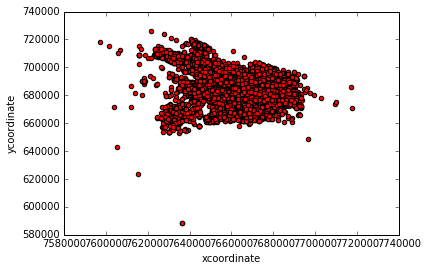

In [38]:
# df.plot.scatter(x='xcoordinate', y='ycoordinate', c='r')
df.plot(kind='scatter', x='xcoordinate', y='ycoordinate', c='r')
from matplotlib import pyplot as plt
plt.show()

In [39]:
df.std()

id             17752.799089
record_id      63997.072010
xcoordinate    16113.946724
ycoordinate    11582.723344
dtype: float64

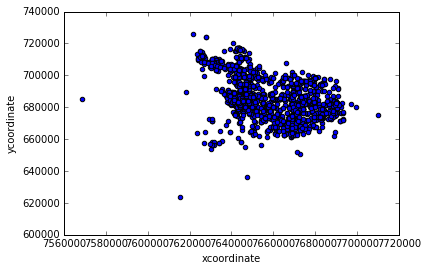

In [40]:
trespasses.plot(kind='scatter', x='xcoordinate', y='ycoordinate')
plt.show()

In [41]:
colornums = mask.astype(int)
# print(type(colornums))
# colornums?
# print(colornums.__dict__)
# print(colornums)

In [42]:
# colornums.index = pd.Series(colornums.index).apply(chr)
colornums

report_date
2014-01-06    0
2014-01-05    0
2014-01-23    0
2014-01-14    0
2014-01-19    1
             ..
2014-11-16    0
2014-06-16    0
2014-07-16    0
2014-09-01    0
2014-09-13    0
Name: major_offense_type, Length: 61497, dtype: int64

In [43]:
colors = np.array(['b', 'r'])[colornums]
colors

array(['b', 'b', 'b', ..., 'b', 'b', 'b'],
      dtype='<U1')

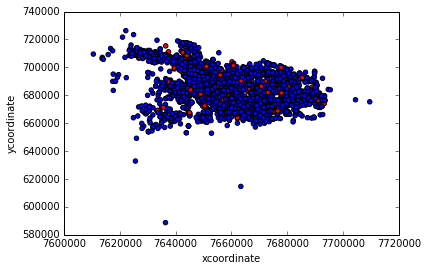

In [50]:
df.plot(kind='scatter', x='xcoordinate', y='ycoordinate', c=colors)
# plt.show()

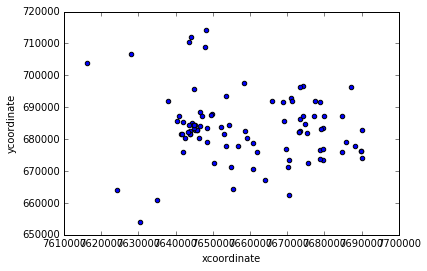

In [54]:
df.sample(100).plot.scatter(x='xcoordinate', y='ycoordinate')
# plt.show()

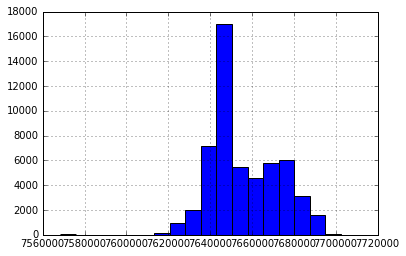

In [55]:
df.xcoordinate.hist(bins=20)
# plt.show()

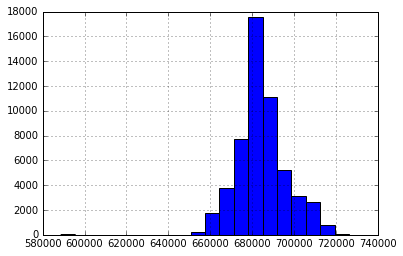

In [56]:
df.ycoordinate.hist(bins=20)
# plt.show()

In [92]:
df.plot?

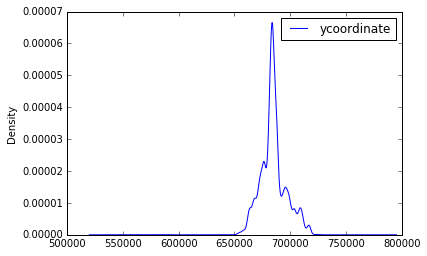

In [60]:
df.plot.density(x='xcoordinate', y='ycoordinate')

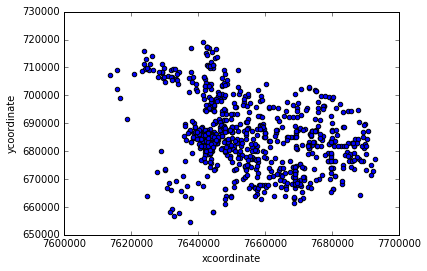

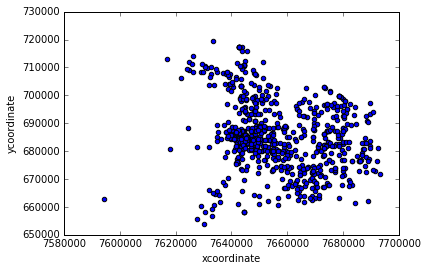

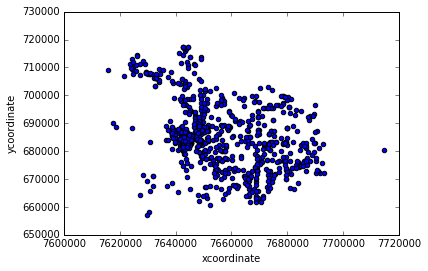

In [99]:
df.sample(1000).plot.scatter(x='xcoordinate', y='ycoordinate')
mpld3.enable_notebook()
plt.show()

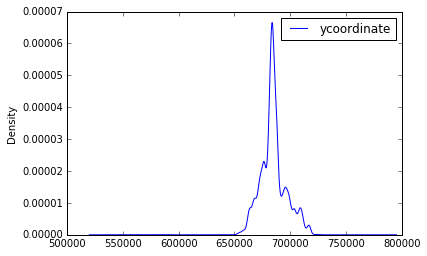

In [94]:
plt.show()

In [68]:
# extract only rows for a few crimes
crimenames = 'trespass|burglary|curfew|vandalism'.split('|')
mask = np.array([False] * len(df))
for crime in crimenames:
    mask |= (df.major_offense_type == crime)
somecrimes = df[mask].copy()
somecrimes.describe()

id     record_id   xcoordinate    ycoordinate
count  11342.000000  1.134200e+04  1.045100e+04   10451.000000
mean   29760.362899  1.438773e+07  7.657039e+06  684410.159733
std    17539.003560  6.463765e+04  1.661731e+04   12233.915296
min       12.000000  1.427185e+07  7.568600e+06  590499.173230
25%    14234.500000  1.433159e+07  7.644356e+06  676432.092850
50%    30232.000000  1.438635e+07  7.653881e+06  683803.103020
75%    43937.500000  1.444473e+07  7.670028e+06  691120.468665
max    61494.000000  1.454248e+07  7.710211e+06  725838.940620

In [69]:
# can you do this with a collections.Counter class?
crimecounts = somecrimes.major_offense_type.value_counts()
print(crimecounts)

vandalism    4411
burglary     4102
trespass     2805
curfew         24
Name: major_offense_type, dtype: int64


In [74]:
d = dict(zip(crimenames, list('rgbcmk')))
somecrimes['color'] = somecrimes.major_offense_type.replace(d)
somecrimes.describe()


id     record_id   xcoordinate    ycoordinate
count  11342.000000  1.134200e+04  1.045100e+04   10451.000000
mean   29760.362899  1.438773e+07  7.657039e+06  684410.159733
std    17539.003560  6.463765e+04  1.661731e+04   12233.915296
min       12.000000  1.427185e+07  7.568600e+06  590499.173230
25%    14234.500000  1.433159e+07  7.644356e+06  676432.092850
50%    30232.000000  1.438635e+07  7.653881e+06  683803.103020
75%    43937.500000  1.444473e+07  7.670028e+06  691120.468665
max    61494.000000  1.454248e+07  7.710211e+06  725838.940620

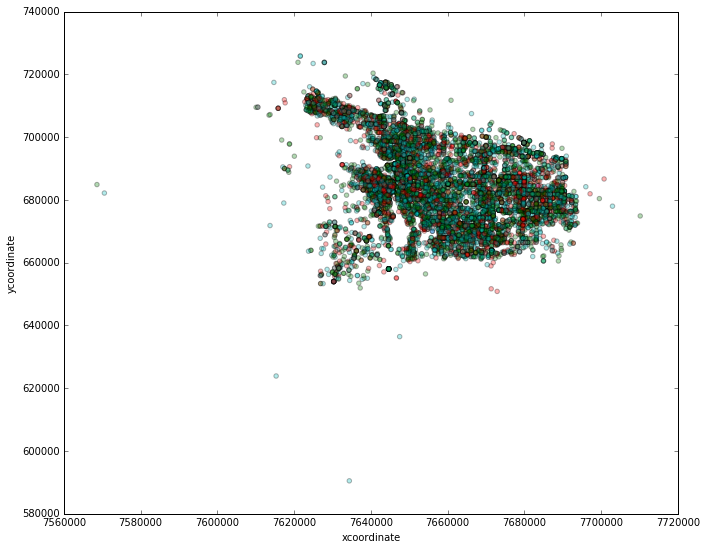

In [82]:
somecrimes.plot(kind='scatter', x='xcoordinate', y='ycoordinate', c=somecrimes.color, figsize=(11, 9), alpha=.3, marker='o')

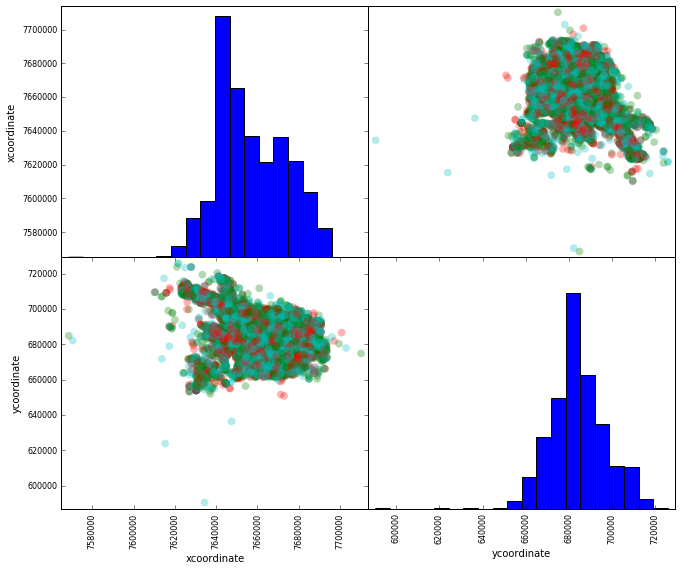

In [81]:
# create a scatter matrix from the dataframe, color by y_train
scat = pd.plotting.scatter_matrix(dflatlon, c=somecrimes.color, figsize=(11, 9), marker='o',
                                 hist_kwds={'bins': 20}, s=60, alpha=.3)